<a href="https://colab.research.google.com/github/vinothalagupandi/keras-tf/blob/master/classroom-practice/Linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from IPython.display import Image
#imports
import numpy as np
import matplotlib.pyplot as plt


In [1]:
!wget https://raw.githubusercontent.com/vinotharjun/ml-workshop/master/Linear%20Regression/salarydata.csv

--2024-02-08 19:10:36--  https://raw.githubusercontent.com/vinotharjun/ml-workshop/master/Linear%20Regression/salarydata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 423 [text/plain]
Saving to: ‘salarydata.csv’

salarydata.csv      100%[===================>]     423  --.-KB/s    in 0s      

2024-02-08 19:10:36 (32.3 MB/s) - ‘salarydata.csv’ saved [423/423]



# Traditional overhyped Machine learning pipeline


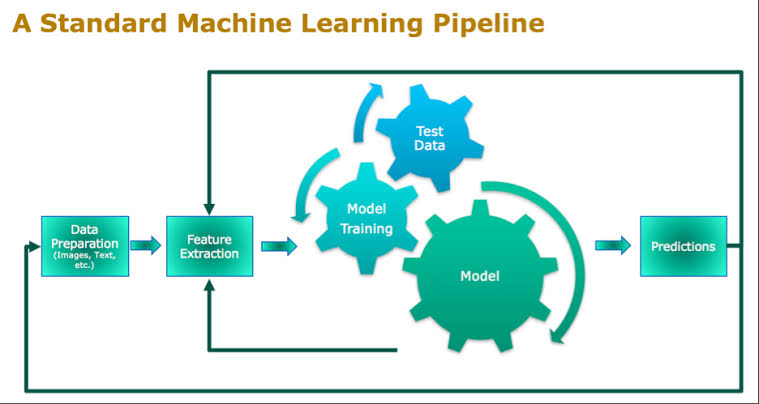

In [ ]:
Image(filename="./Images/pipline.jpg",width=700)

# matrix  operation advantages

In [ ]:
import time

a=np.random.rand(1000000)
b=np.random.rand(1000000)
tic =time.time()
c=np.dot(a,b)
toc=time.time()
print(c)
print("vectorized version "+str(1000*(toc-tic))+" ms")
c=0
tic=time.time()
for i in range(1000000):
    c=c+a[i]*b[i]
toc=time.time()
print(c)
print("for loop "+str(1000*(toc-tic))+" ms")

250012.54714225285
vectorized version 399.1682529449463 ms
250012.5471422422
for loop 1133.9943408966064 ms


# Simple Linear regression Example

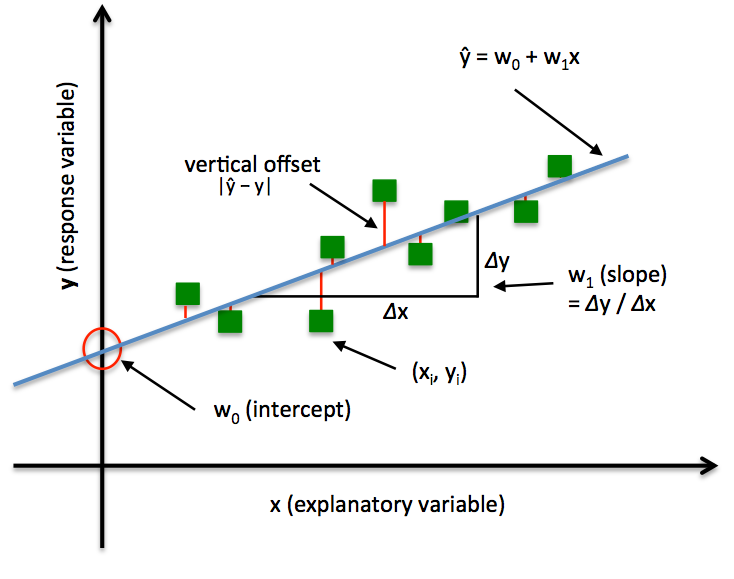

In [ ]:

Image(filename='./images/01.png', width=800)


# Background

## Hyperparameters
In statistics hyperparameters are parameters of a prior distribution. In our case it relates to the parameters of our model (the number of layers in a neural network, the number of neurons in each layer, the learning rate, regularization, etc.). The concept will become clear as we discuss some models.


# Loss Function

A loss function is a way to map the performance of our model into a real number. It measures how well the model is performing its task, be it a linear regression model fitting the data to a line, a neural network correctly classifying an image of a character, etc. The loss function is particularly important in learning since it is what guides the update of the parameters so that the model can perform better.

## Error Function
he squared loss function can be seen in Eq. (1), where M is the number of training points, y is the estimated value and y^ is the ground-truth value.


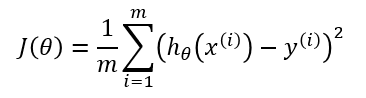

In [ ]:
Image(filename='./images/costfunction.png', width=500)

# Gradient decent  optimization  
One of the methods we can use to minimize Eq. (2) is Gradient Descent, which is based on using gradients to update the model parameters (w and b in our case) until a minimum is found and the gradient becomes zero. Convergence to the global minimum is guaranteed (with some reservations) for convex functions since that’s the only point where the gradient is zero. An animation of the Gradient Descent method is shown in Fig 2.

In [ ]:
# Image(filename='./images/gradientdcnt.png', width=500)

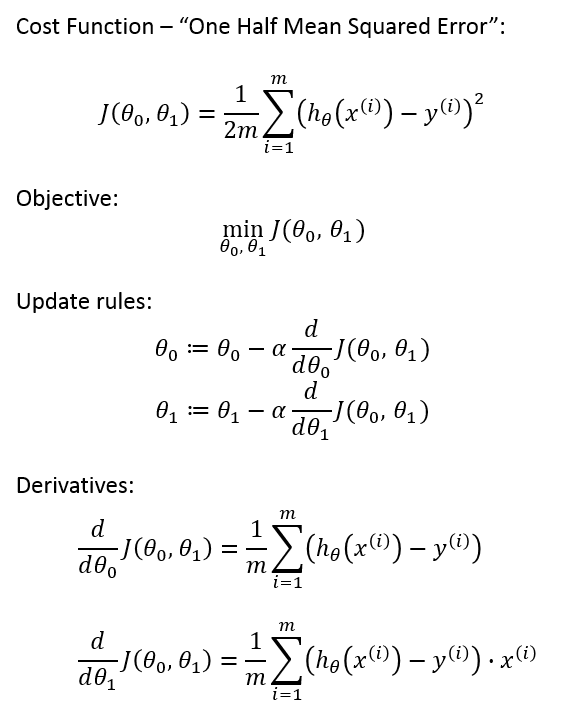

In [ ]:
Image(filename='./images/overall.png', width=400)

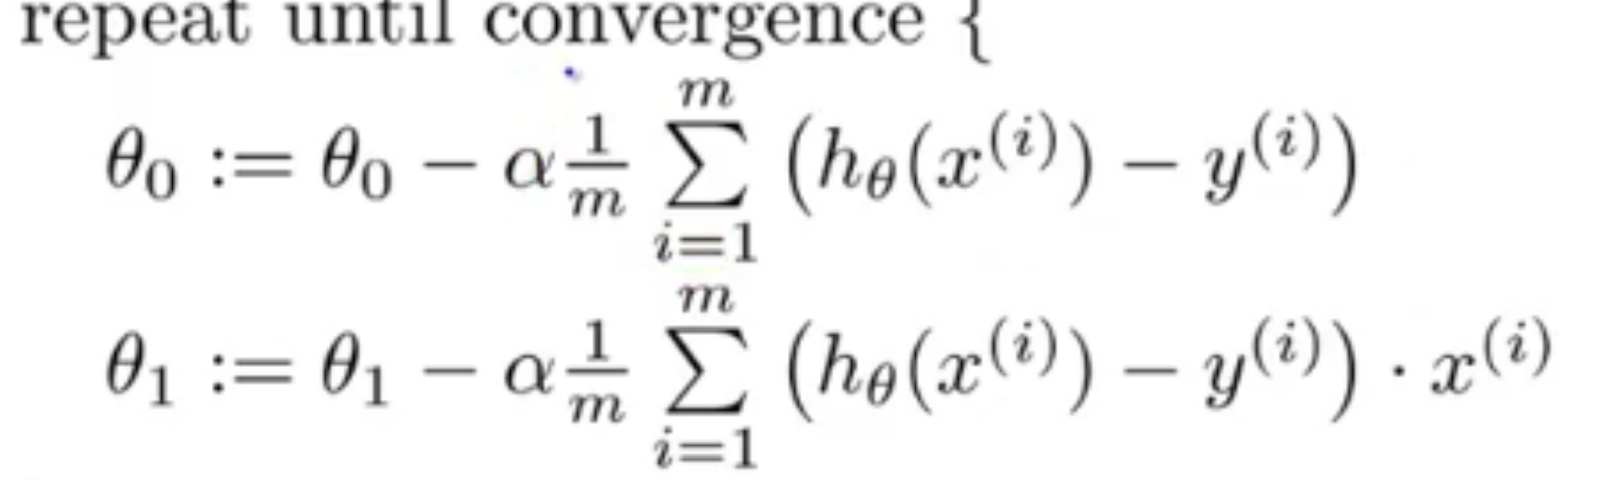

In [ ]:
Image(filename='./images/gradientdcnt.png', width=500)

In [2]:
#importing the dataanalytics tool
import pandas as pd

#reading the csv file
data = pd.read_csv("./salarydata.csv")

#printing first 5 coloumns
#df.head(10)
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# train test split

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(data,test_size=0.1,random_state=101)

# plot the dataset

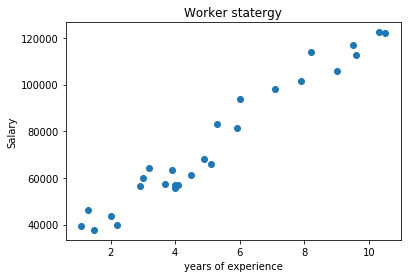

In [ ]:
#Plot the dataset
x_train=np.array(train_data["YearsExperience"])
y_train=np.array(train_data["Salary"])
x_test=np.array(test_data["YearsExperience"])
y_test=np.array(test_data["Salary"])
plt.scatter(x_train,y_train)
plt.xlabel('years of experience')
plt.ylabel('Salary')
plt.title('Worker statergy')
plt.show()

In [ ]:
#hyperparamters
learning_rate = 0.0001
initial_b = 0
initial_w = 0
num_iterations = 700

# cost computation

In [ ]:
def compute_cost(b,w, x,y):
    total_cost = 0
    N = float(len(x))

    #Compute sum of squared errors
    for i in range(0, len(x)):
        total_cost += (y[i] - (w * x[i] + b)) ** 2
    loss = total_cost/N
    #Return average of squared error
    return loss


In [ ]:
compute_cost(2,3,x_train,y_train)

6357402848.369259

# gradient descent implementation

In [ ]:
def gradient_descent_runner(x,y, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    cost_graph = []

    #For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b,w,x,y))
        b, w = step_gradient(b, w, x,y, learning_rate)

    return [b, w, cost_graph]

In [ ]:
gradient_descent_runner(x_train,y_train,1,2,0.01,4)

[2352.517944852506,
 12846.17941885596,
 [6358483838.797035, 656970851.2034116, 202593542.52505395, 165415880.3411389]]

In [ ]:
def step_gradient(b_current, w_current, x,y, learning_rate):
    dw = 0
    db = 0
    N = float(len(x))

    #Calculate Gradient
    for i in range(0, len(x)):
        #x = points[i, 0]
        #y = points[i, 1]
        dw += - (2/N) * x[i] * (y[i] - (w_current * x[i] + b_current))
        db += - (2/N) * (y[i] - (w_current * x[i] + b_current))

    #Update current m and b
    w_updated = w_current - learning_rate * dw
    b_updated = b_current - learning_rate * db

    #Return updated parameters
    return b_updated, w_updated

In [ ]:
step_gradient(1,2,[1,2],[1,2],0.01)

(0.95, 1.92)

In [ ]:

b, w, cost_graph = gradient_descent_runner(x_train,y_train, initial_b, initial_w, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized w:', w)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, w , x_train,y_train))


Optimized b: 2663.3204990004865
Optimized w: 12798.109985075678
Minimized cost: 158114540.57626322


# plotting Cost computation flow

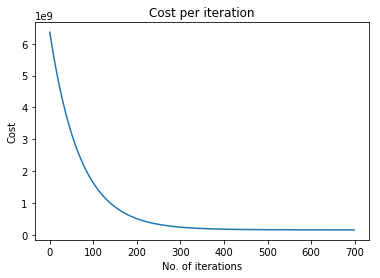

In [ ]:
plt.plot(cost_graph)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.title('Cost per iteration')
plt.show()

# Regressor line (final fitting)

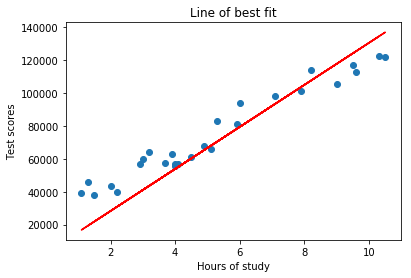

In [ ]:
#Plot dataset
plt.scatter(x_train, y_train)
#Predict y values
pred = w * x_train + b
#Plot predictions as line of best fit
plt.plot(x_train, pred, c='r')
plt.xlabel('Hours of study')
plt.ylabel('Test scores')
plt.title('Line of best fit')
plt.show()


# learned parameter

In [ ]:
w,b


(12798.109985075678, 2663.3204990004865)

# model Evaluation

In [ ]:
testprediction= w*x_test+b

In [ ]:
mse_vinod = (np.square(testprediction - y_test)).mean(axis=None)
print(testprediction)

[ 89690.46839752 114006.87736916  43617.27245124]


In [ ]:
print(y_test)

[ 91738. 109431.  54445.]


# Sklearn implementation(super simple)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
dataset = pd.read_csv('./salarydata.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values


# Splitting the dataset into the Training set and Test set
# --------------------------------------------------------
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


# print(X_train, X_test, y_train, y_test)

# Fitting Simple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

y_pred,y_test

C:\Users\solai\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(array([ 40628.97301142, 123152.87216178,  65011.03412402]),
 array([ 37731., 122391.,  57081.]))

# Visualizing data

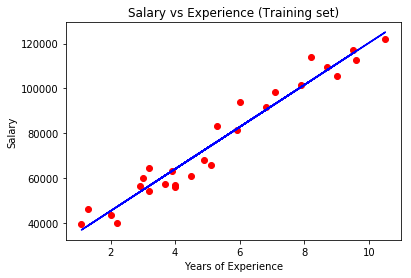

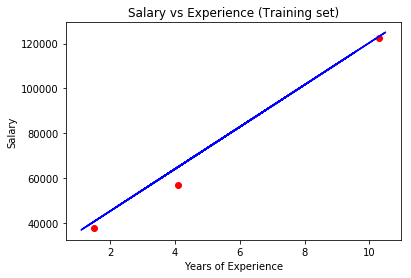

In [ ]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [ ]:
mse_sklearn = (np.square(y_pred -y_test)).mean(axis=None)

# result comparision

In [ ]:
y_pred,testprediction

(array([ 40628.97301142, 123152.87216178,  65011.03412402]),
 array([ 89690.46839752, 114006.87736916,  43617.27245124]))

# errror comparision

In [ ]:
mse_sklearn,mse_vinod

(23954712.657997515, 47456907.743624456)

# Learned  parameters

In [ ]:
regressor.coef_,regressor.intercept_

(array([9377.71581254]), 26562.39929260697)